# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [43]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import dill
import torch
import numpy as np

### Helper Functions

In [44]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages


def report_actions(state):
    action_names = [
        "end",
        "left",
        "right",
        "up",
        "down",
        "shot",
    ]

    actions = policy_net(state).tolist()[0]
    actions = list(zip(action_names, actions))
    for an, a in actions:
        print("{}: \t{}".format(an, a))
    print("-----{}-----".format(
        action_names[int(torch.argmax(policy_net(state)))]
    ))

### Load Data

## Method Analysis

### Random

Number of games played: 37700


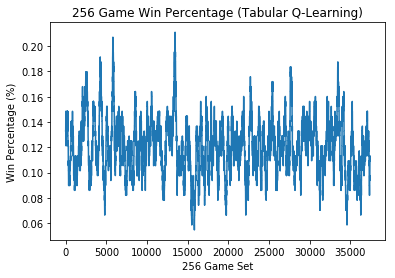

{'Strahd': 0.8797347480106101, 'Leotris': 0.12026525198938992}

In [3]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_random.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) -
               batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Ranged Aggression

Number of games played: 12000


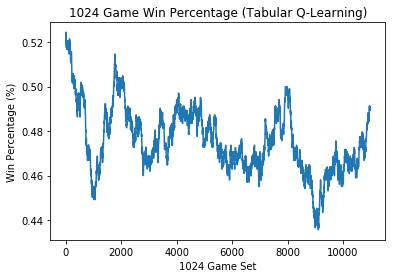

{'Strahd': 0.5225, 'Leotris': 0.4775}

In [4]:
batch_size = 1024
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_ranged_aggression.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Tabular Q-Learning

Number of games played: 7100


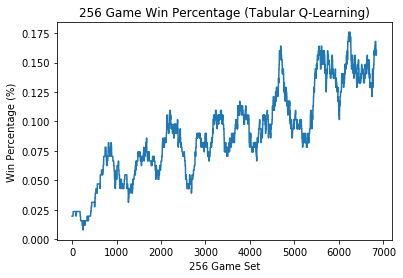

{'Strahd': 0.9094366197183099, 'Leotris': 0.09056338028169014}

In [5]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_q_tabular.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## Linear Function Approximation

Number of games played: 67600


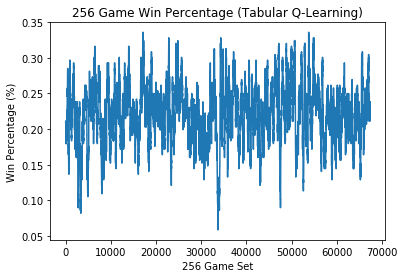

{'Leotris': 0.22146449704142013, 'Strahd': 0.7785355029585799}

In [6]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_linear_function_approximation.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### DQN

Number of games played: 28100


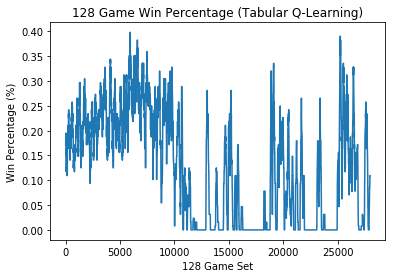

{'Strahd': 0.716049822064057,
 'Leotris': 0.12569395017793594,
 'Timeout': 0.15825622775800713}

In [7]:
batch_size = 128
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_DQN.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Double DQN:

Number of games played: 100


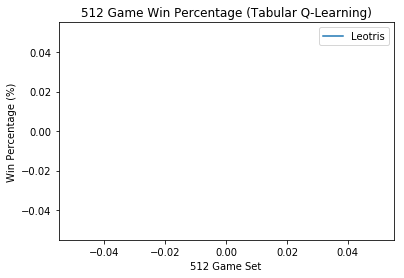

In [73]:
batch_size = 512
win_pcts = defaultdict(list)

creatures = ["Leotris"]

winner_list = dill.load(open("results/winner_list_double_DQN.pickle", "rb"))

print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
    
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))

plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.show()

## SARSA

Number of games played: 12400


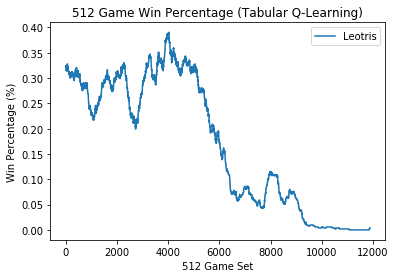

In [103]:
batch_size = 512
win_pcts = defaultdict(list)

creatures = ["Leotris"]

winner_list = dill.load(open("results/winner_list_SARSA.pickle", "rb"))

print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
    
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))

plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.show()

## Scratch

In [98]:
policy_net = dill.load(open("results/model_SARSA.pickle", "rb"))

state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.1, # x pos
    0.2, # y pos
    0.2, # enemy x
    0.2, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    -0.7, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.1, # x pos
    0.2, # y pos
    0.2, # enemy x
    0.2, # enemy y
    1.0, # attacks used
    1.0, # movement remaining
    -0.7, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.1, # x pos
    0.2, # y pos
    0.2, # enemy x
    0.2, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    -0.9, # number steps
]])

report_actions(state)
print()
state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.1, # x pos
    0.1, # y pos
    0.2, # enemy x
    0.2, # enemy y
    1.0, # attacks used
    1.0, # movement remaining
    -0.9, # number steps
]])

report_actions(state)

end: 	-0.5513925552368164
left: 	-0.4910935163497925
right: 	-0.48467910289764404
up: 	-0.4958447217941284
down: 	-0.4856569766998291
shot: 	-0.5494725704193115
-----right-----

end: 	-0.6033002138137817
left: 	-0.5342663526535034
right: 	-0.5296204090118408
up: 	-0.5390580892562866
down: 	-0.5310897827148438
shot: 	-0.6087722778320312
-----right-----

end: 	54.84324645996094
left: 	54.429298400878906
right: 	54.57524108886719
up: 	54.37268829345703
down: 	54.6109504699707
shot: 	55.69266128540039
-----shot-----

end: 	54.93372344970703
left: 	54.26365661621094
right: 	54.358978271484375
up: 	54.263946533203125
down: 	54.438541412353516
shot: 	54.437957763671875
-----end-----
